In [2]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")


In [3]:
import os
# download HybSur data file: https://git.ligo.org/lscsoft/lalsuite-extra/-/blob/master/data/lalsimulation/NRHybSur3dq8_lal.h5
# set path
os.environ['LAL_DATA_PATH'] = '/Users/sebastian.khan/Downloads/'

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})
import lalsimulation as lalsim
import phenom
import numpy as np

import waveform_generator
import hybrid_utils

<Figure size 640x480 with 0 Axes>

/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [5]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [6]:
# I don't think this equation is quite correct.
# it doesn't seem to work for the (4,4) mode..
def delta_phi_fn(m):
    z = (-1)*(-1.j)**m
    return np.arctan2(z.imag, z.real)

In [7]:
# modes = [(2,2),(2,1),(3,3),(3,2),(4,4),(4,3)]
# modes = [(2,2),(2,1),(3,3),(4,4)]
modes = [(2,2),(3,2),(4,4)]

In [8]:
import h5py

# SXS:BBH:1132
f = h5py.File("/Users/sebastian.khan/Downloads/rhOverM_Asymptotic_GeometricUnits_CoM.h5", 'r')

# f['Extrapolated_N4.dir'].keys()

hlm_={}
for mode in modes:
    key = f"Y_l{mode[0]}_m{mode[1]}.dat"
    hlm_[mode]=np.array(f['Extrapolated_N2.dir'][key])


hlm={}
for mode in modes:
    hlm[mode] = hlm_[mode][:,1] + 1.j*hlm_[mode][:,2]

t = hlm_[2,2][:,0]

wf = {}
wf['t'] = t - t[-1]
wf['hlm'] = hlm.copy()

f.close()

In [9]:
wf = hybrid_utils.compute_amplitude(wf)
wf = hybrid_utils.compute_phase(wf)
wf = hybrid_utils.compute_frequency(wf)

(-500.0, -300.0)

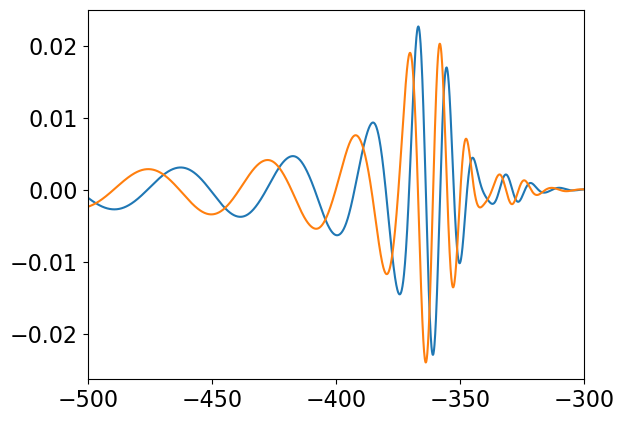

In [10]:
# plt.plot(wf['t'], wf['hlm'][2,2].real)
# plt.plot(wf['t'], wf['hlm'][2,2].imag)

plt.plot(wf['t'], wf['hlm'][3,2].real)
plt.plot(wf['t'], wf['hlm'][3,2].imag)
plt.xlim(-500, -300)

(-7.0, -5.0)

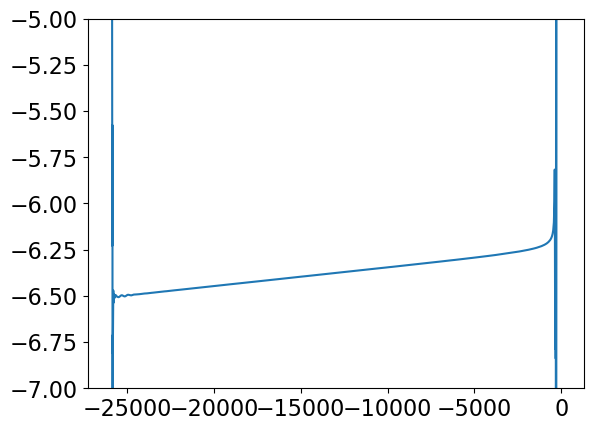

In [11]:
mode = (3,2)
plt.plot(wf['t'], wf['phase'][mode] - mode[1] * wf['phase'][2,2]/2)
# plt.xlim(-500, -300)
plt.ylim(-7,-5)

In [12]:

# nr_hdf5_filename="/Users/sebastian.khan/Downloads/GT0448.h5" #q=1
# nr_hdf5_filename="/Users/sebastian.khan/Downloads/ExtrapStrain_RIT-BBH-0112-n100.h5" #q=1

# nr_hdf5_filename="/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res4.h5" #q=1
# nr_hdf5_filename="/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res3.h5" #q=2
# nr_hdf5_filename="/Users/sebastian.khan/personal/data/SXS_BBH_0167_Res5.h5" #q=4
# nr_hdf5_filename="/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res5.h5" #q=5
# nr_hdf5_filename="/Users/sebastian.khan/personal/data/SXS_BBH_0063_Res5.h5" #q=8
# nr_hdf5_filename="/Users/sebastian.khan/personal/data/SXS_BBH_0303_Res3.h5" #q=10


# nr_hdf5_filename="/Users/sebastian.khan/Downloads/MAYA0909.h5"

nr_hdf5_filename="/Users/sebastian.khan/Downloads/ExtrapStrain_RIT-BBH-0245-n120.h5"
# nr_hdf5_filename="/Users/sebastian.khan/Downloads/ExtrapStrain_RIT-BBH-0337-n120.h5"

# sample spacing in units of M for output NR time series
delta_t=0.1
wf_nr = waveform_generator.get_hdf5_strain(nr_hdf5_filename, modes, delta_t)

print(wf_nr['metadata'])

# should add a test is mass-ratio == 1 and spins are equal then don't include odd-m modes
# try:
#     np.testing.assert_approx_equal(wf_nr['metadata']['q'], 1)
#     modes = [(2,2),(3,2),(4,4)]
# except:
#     pass


# f_min=28
# f_min=22
# f_min=20
# f_min=15
# f_min=13
f_min=12


wf_sur = waveform_generator.generate_pn_waveform(
    q=wf_nr['metadata']['q'],
    modes=modes,
    f_min=f_min,
    S1z=wf_nr['metadata']['spin1z'],
    S2z=wf_nr['metadata']['spin2z'],
    # approximant=lalsim.IMRPhenomTHM,
    approximant=lalsim.NRHybSur3dq8,
    # approximant=lalsim.TaylorT1,
    # approximant=lalsim.SEOBNRv4PHM,
    deltaT=1/8192,
)


{'q': 1.9984919999743989, 'filename': '/Users/sebastian.khan/Downloads/ExtrapStrain_RIT-BBH-0245-n120.h5', 'M': 0.9995028408657409, 'spin1z': -0.851371156019426, 'spin2z': 0.500030879793532}


In [13]:
wf_nr = hybrid_utils.compute_amplitude(wf_nr)
wf_nr = hybrid_utils.compute_phase(wf_nr)
wf_nr = hybrid_utils.compute_frequency(wf_nr)

In [14]:
wf_sur = hybrid_utils.compute_amplitude(wf_sur)
wf_sur = hybrid_utils.compute_phase(wf_sur)
wf_sur = hybrid_utils.compute_frequency(wf_sur)

In [15]:
# # wf_nr['t'] = wf_nr['t'] + 300
# wf_nr['t'] = wf_nr['t'] + 75

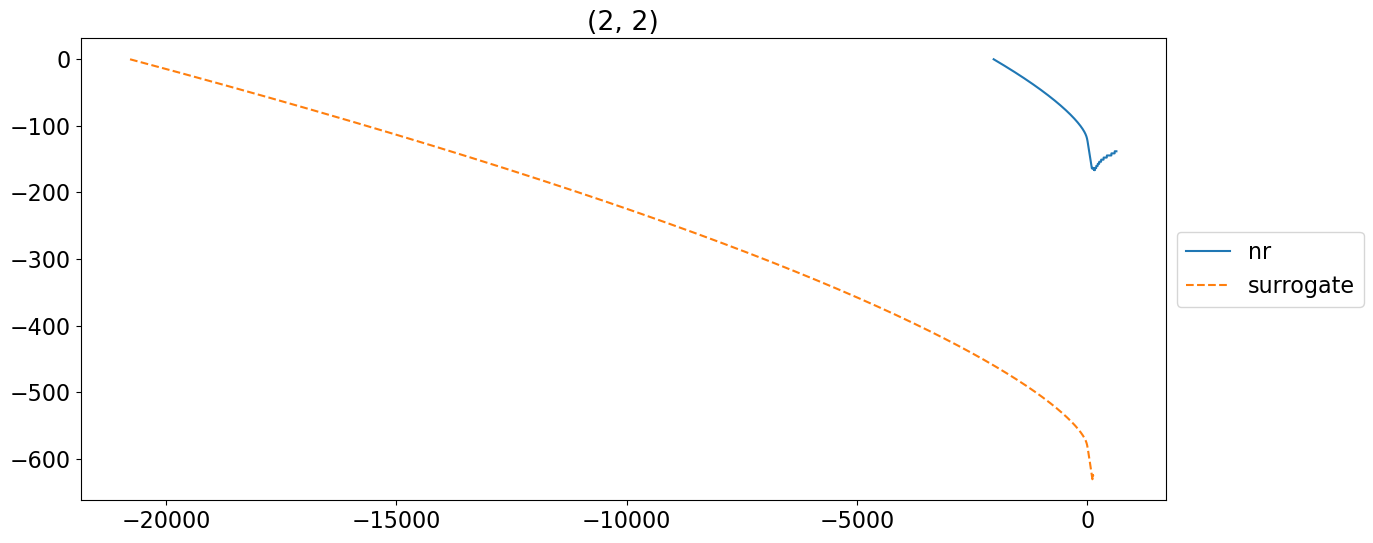

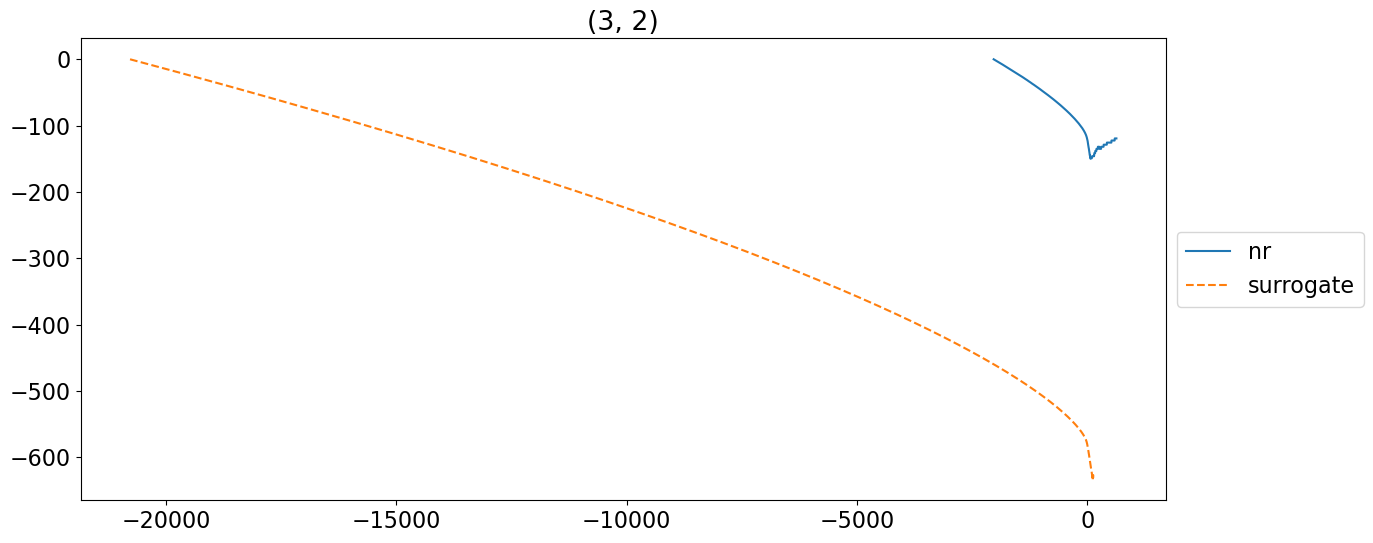

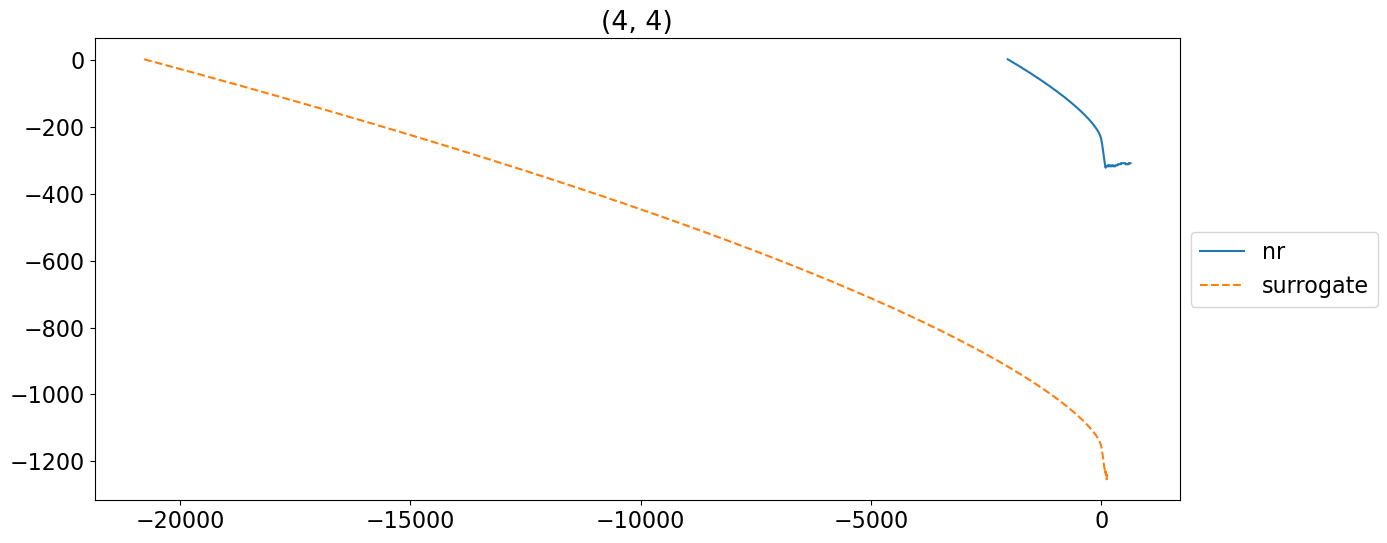

In [16]:
for mode in modes:
    plt.figure(figsize=(14,6))
    plt.plot(wf_nr['t'], wf_nr['phase'][mode], label='nr')
    plt.plot(wf_sur['t'], wf_sur['phase'][mode], label='surrogate', ls='--')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(mode)
    plt.show()
    plt.close()

In [17]:
iphase_nr_22 = IUS(wf_nr['t'], wf_nr['phase'][2,2])
iphase_sur_22 = IUS(wf_sur['t'], wf_sur['phase'][2,2])

phase_shift_22 = iphase_sur_22(wf_nr['t'][0]) - iphase_nr_22(wf_nr['t'][0])

phase_shift_orb = phase_shift_22/2

In [18]:
phase_shift_orb

-229.98129776986138

In [19]:
# apply phase shift to surrogate modes
phase = {}
for mode in wf_sur['phase'].keys():
    phase[mode] = wf_sur['phase'][mode] - mode[1] * phase_shift_orb
wf_sur['phase'] = phase.copy()
del phase

In [20]:
# resample to sample NR time grid
wf_sur_new = {}
wf_sur_new['t'] = wf_nr['t'].copy()
wf_sur_new['hlm'] = {}
for mode in modes:
    hlm_real = IUS(wf_sur['t'], np.real(wf_sur['hlm'][mode]), ext=1)(wf_sur_new['t'])
    hlm_imag = IUS(wf_sur['t'], np.imag(wf_sur['hlm'][mode]), ext=1)(wf_sur_new['t'])
    wf_sur_new['hlm'][mode] = hlm_real + 1.j*hlm_imag

wf_sur_new = hybrid_utils.compute_amplitude(wf_sur_new)
wf_sur_new = hybrid_utils.compute_phase(wf_sur_new)
wf_sur_new = hybrid_utils.compute_frequency(wf_sur_new)

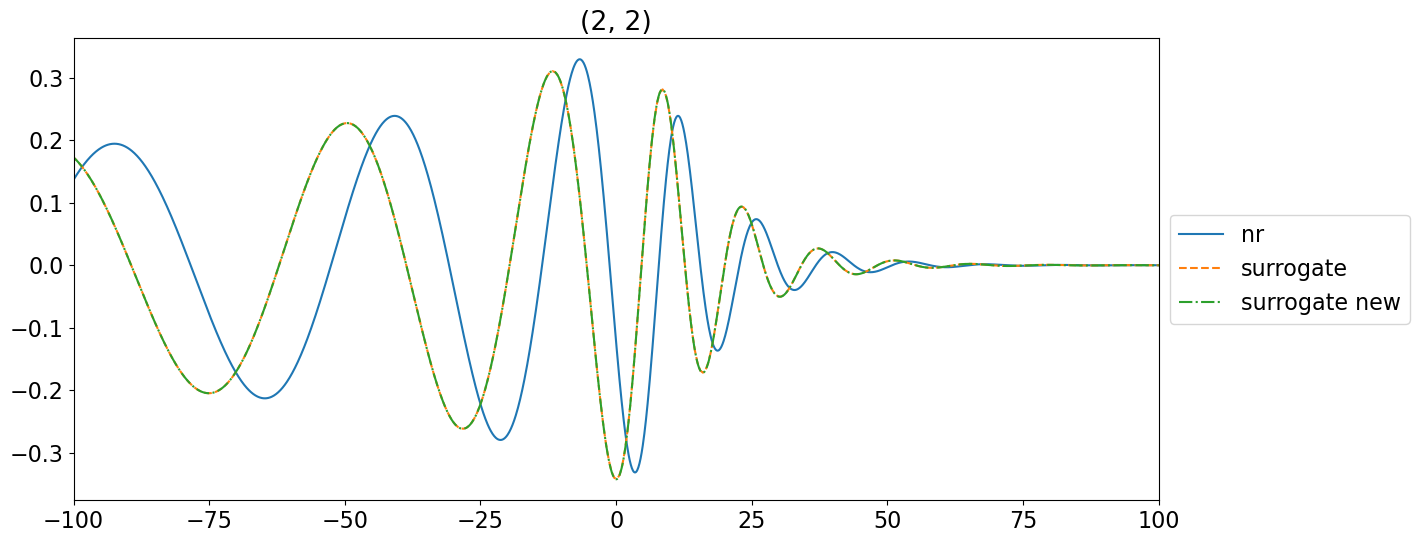

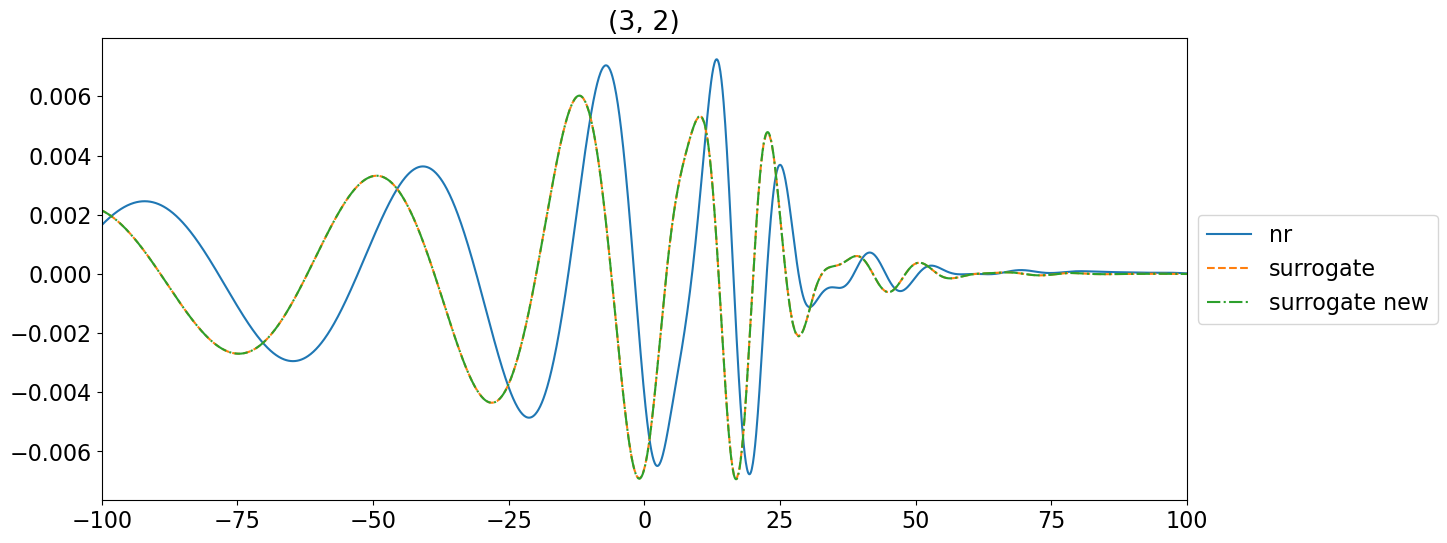

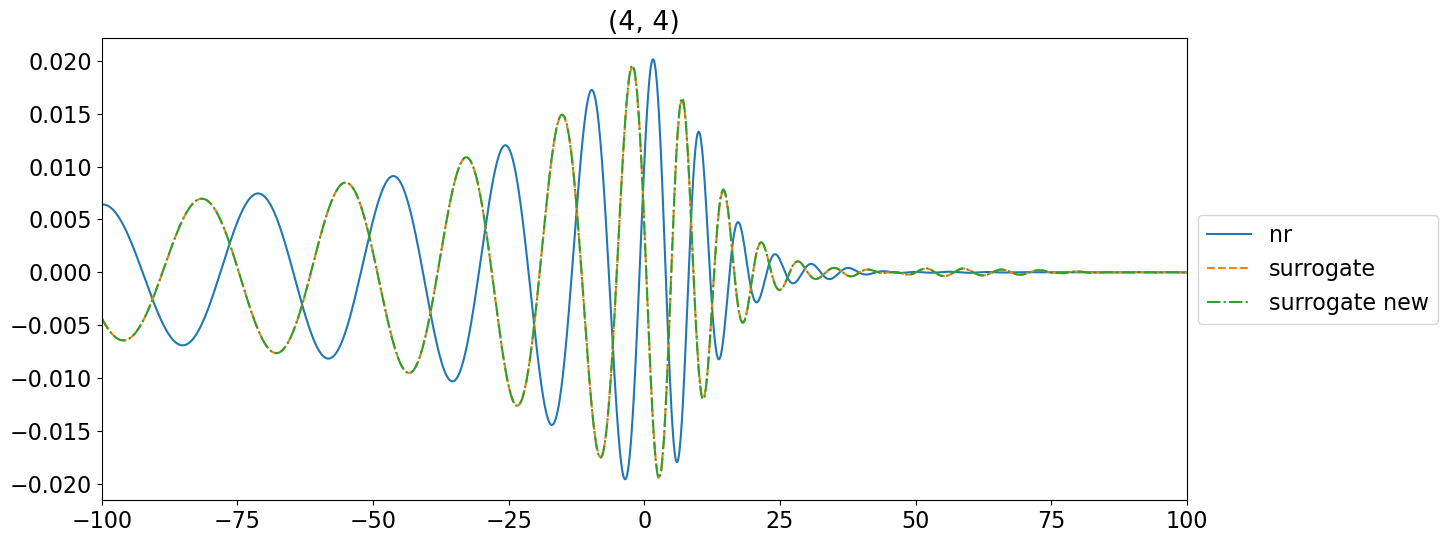

In [21]:
for mode in modes:
    plt.figure(figsize=(14,6))
    plt.plot(wf_nr['t'], wf_nr['hlm'][mode].imag, label='nr')
    plt.plot(wf_sur['t'], wf_sur['hlm'][mode].imag, label='surrogate', ls='--')
    plt.plot(wf_sur_new['t'], wf_sur_new['hlm'][mode].imag, label='surrogate new', ls='-.')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(mode)
    plt.xlim(-100, 100)
    plt.show()
    plt.close()

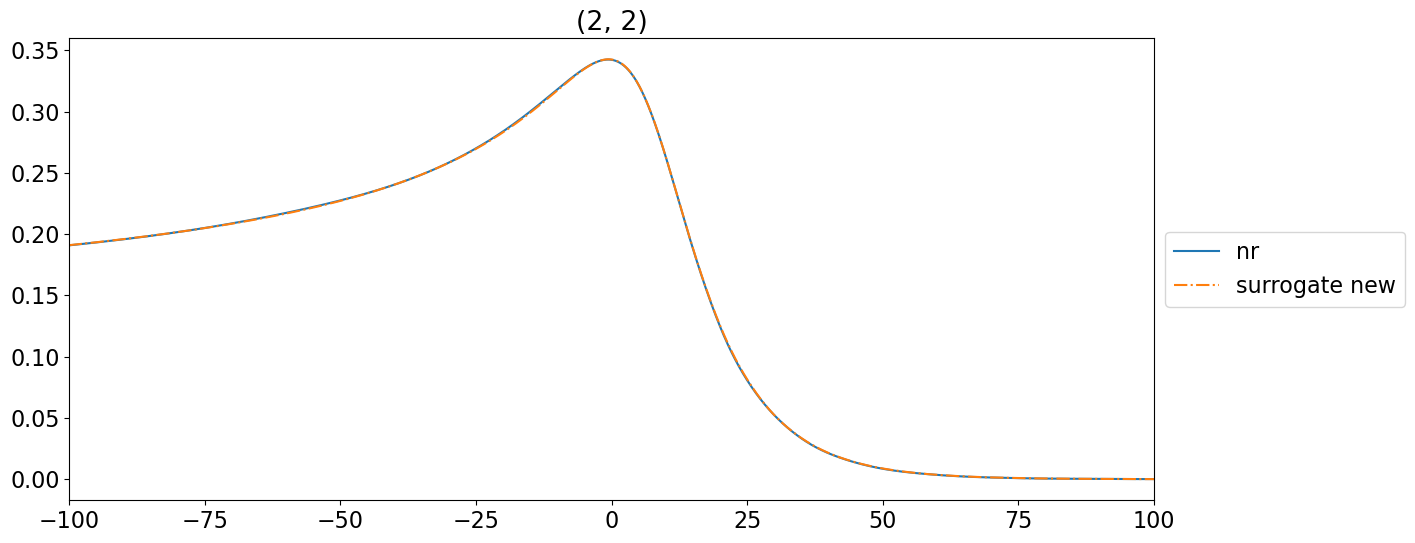

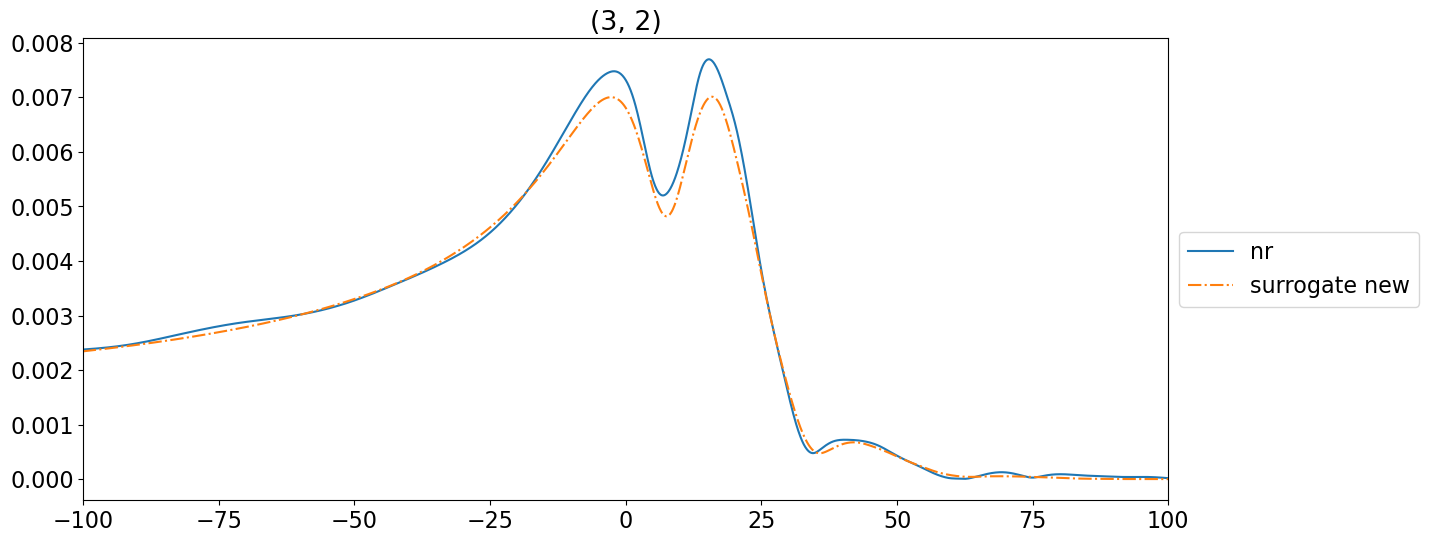

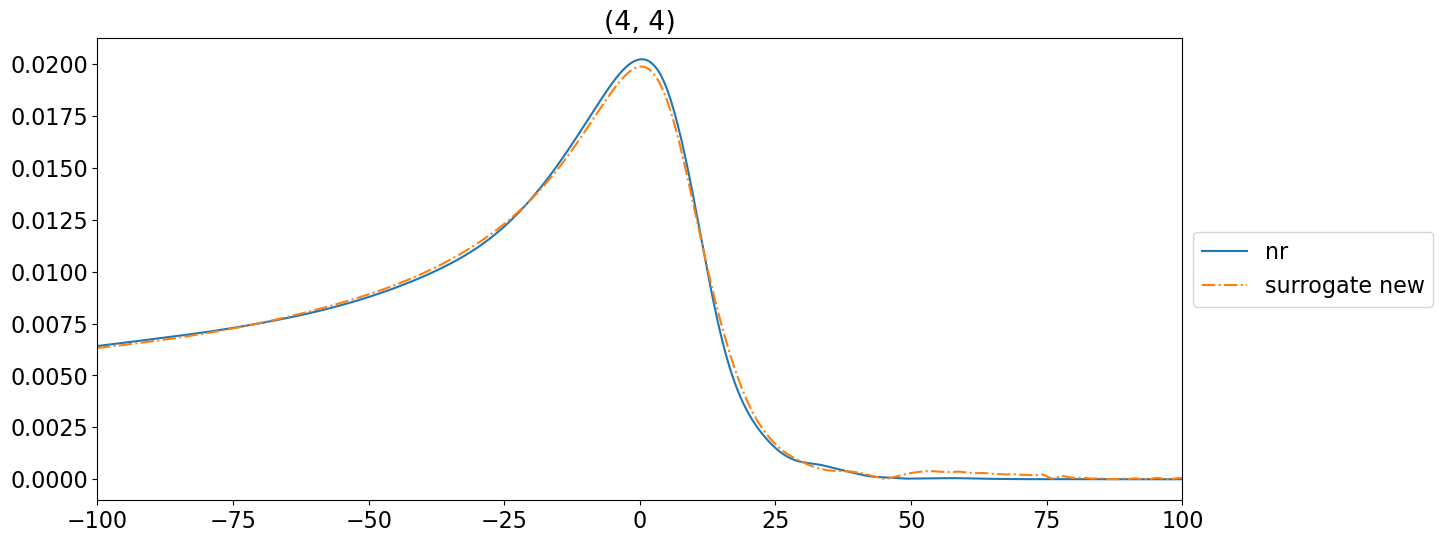

In [25]:
for mode in modes:
    plt.figure(figsize=(14,6))
    plt.plot(wf_nr['t'], np.abs(wf_nr['hlm'][mode]), label='nr')
    plt.plot(wf_sur_new['t'], np.abs(wf_sur_new['hlm'][mode]), label='surrogate new', ls='-.')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(mode)
    plt.xlim(-100, 100)
    plt.show()
    plt.close()

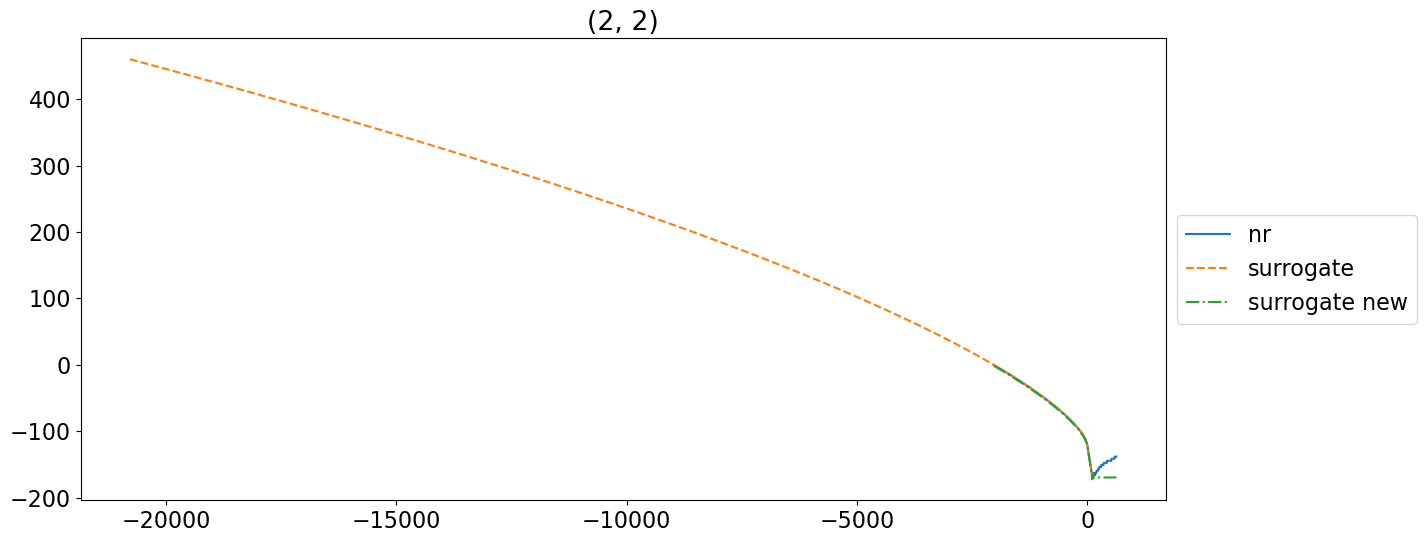

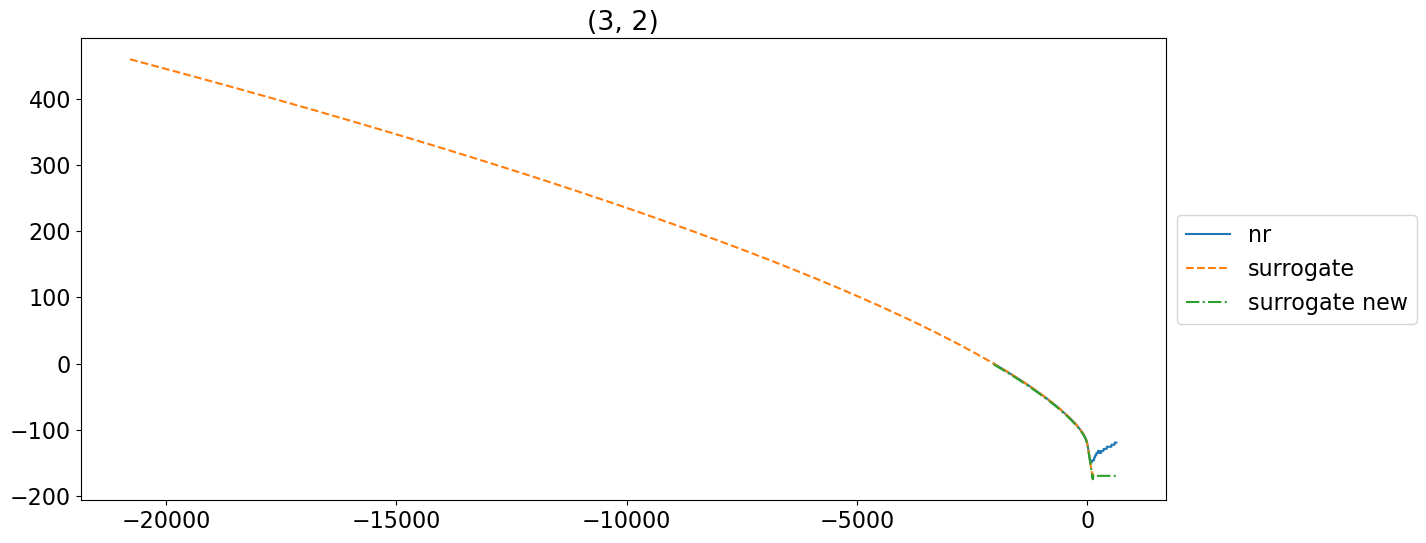

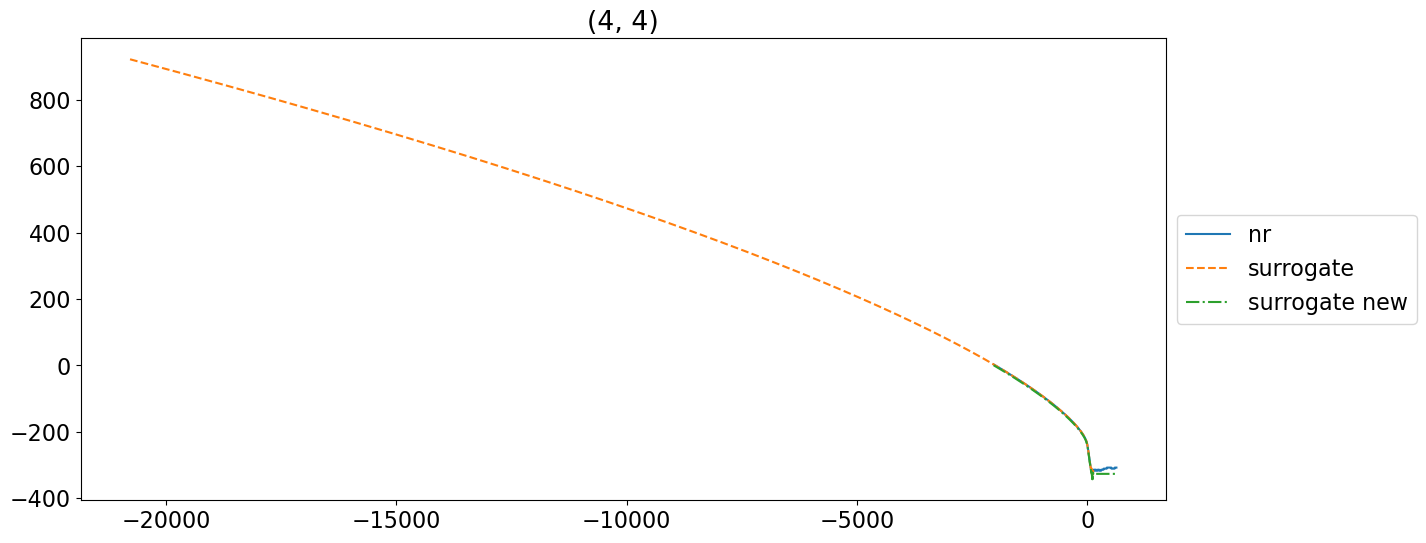

In [22]:
for mode in modes:
    plt.figure(figsize=(14,6))
    plt.plot(wf_nr['t'], wf_nr['phase'][mode], label='nr')
    plt.plot(wf_sur['t'], wf_sur['phase'][mode], label='surrogate', ls='--')
    plt.plot(wf_sur_new['t'], wf_sur_new['phase'][mode], label='surrogate new', ls='-.')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(mode)
    # plt.xlim(-100, 100)
    plt.show()
    plt.close()

(-5000.0, 100.0)

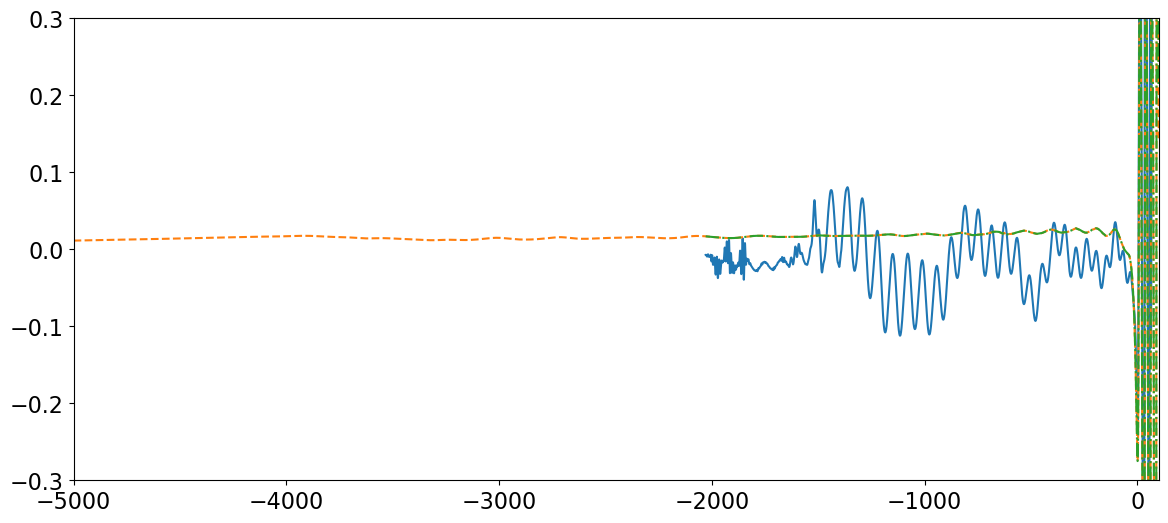

In [23]:
mode = (3,2)
# mode = (3,3)
plt.figure(figsize=(14,6))
plt.plot(wf_nr['t'], (wf_nr['phase'][mode] - mode[1]*wf_nr['phase'][2,2]/2))
plt.plot(wf_sur['t'], wf_sur['phase'][mode] - mode[1]*wf_sur['phase'][2,2]/2, ls='--')
plt.plot(wf_sur_new['t'], wf_sur_new['phase'][mode] - mode[1]*wf_sur_new['phase'][2,2]/2, ls='-.')
# plt.axhline(0)
plt.ylim(-0.3, 0.3)
# plt.ylim(-2,5)
plt.xlim(-5000, 100)
# plt.axvline(-2000)

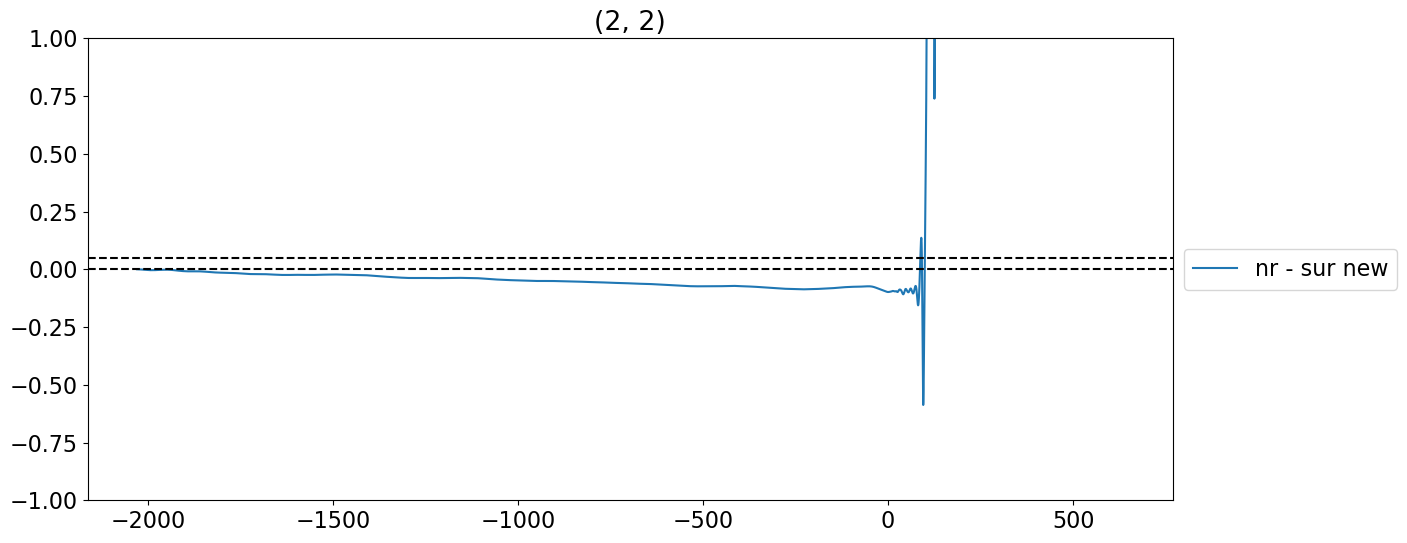

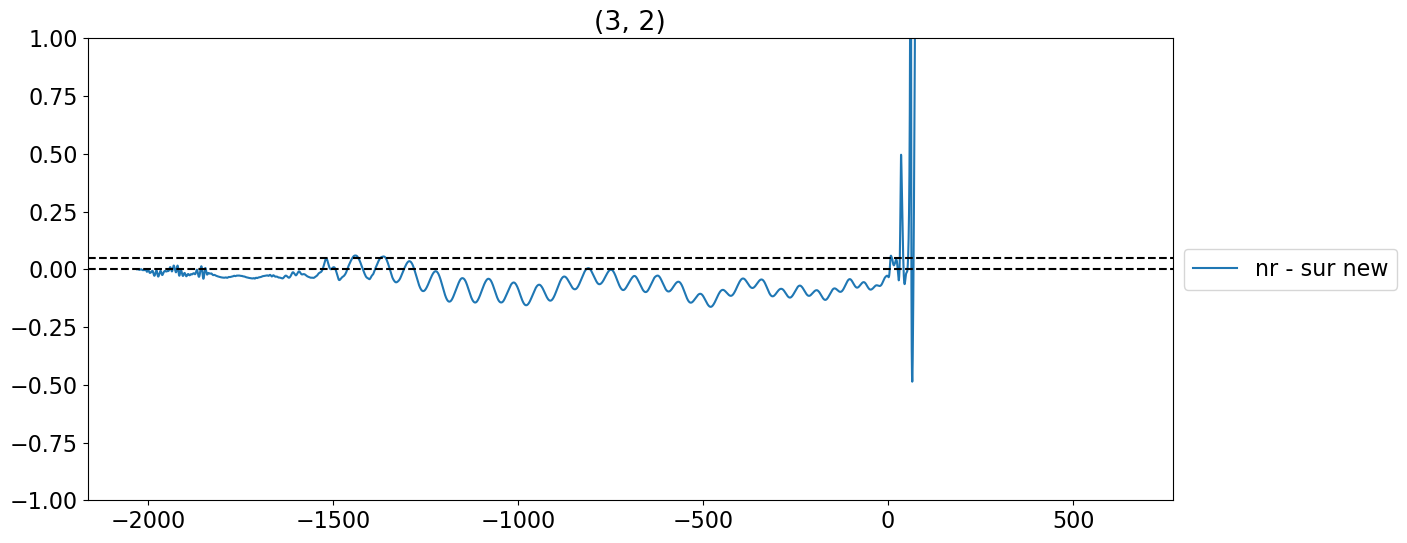

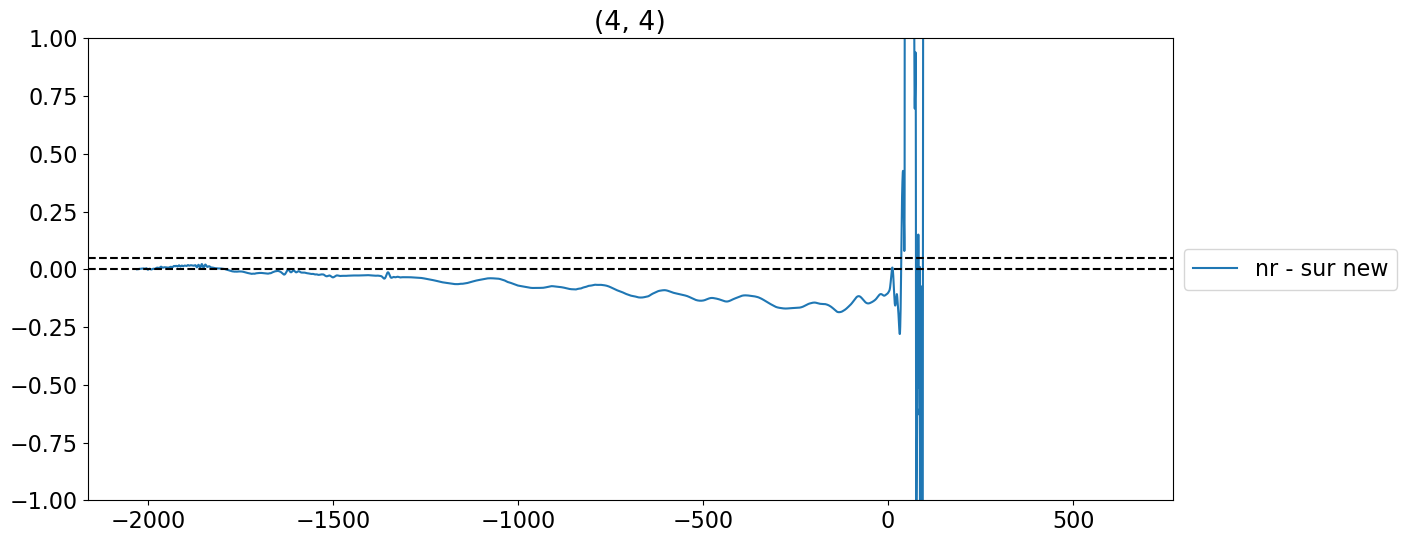

In [24]:
for mode in modes:
    plt.figure(figsize=(14,6))
    plt.plot(wf_nr['t'], (wf_nr['phase'][mode]-wf_nr['phase'][mode][0]) - (wf_sur_new['phase'][mode]-wf_sur_new['phase'][mode][0]), label='nr - sur new')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(mode)
    plt.ylim(-1,1)
    # plt.xlim(-100, 100)
    plt.axhline(0, c='k', ls='--')
    plt.axhline(0.05, c='k', ls='--')
    plt.show()
    plt.close()